In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import matplotlib
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
import altair as alt
pd.set_option('display.max_rows', 500)
import numpy as np

In [12]:
author = pd.read_csv('../data/ht_class/ht_cleaned_author_df.csv')
paper = pd.read_csv('../data/ht_class/ht_cleaned_paper_df.csv')

### Number of publications by year

In [13]:
pub_num_df = paper.groupby(
    'Year').size().reset_index(name = 'Number of Publications')
pub_num_df['Year'] = pd.to_datetime(
    pub_num_df['Year'], format="%Y"
)
pub_num_df.head()

,Year,Number of Publications
0,1990-01-01,52
1,1991-01-01,50
2,1992-01-01,53
3,1993-01-01,55
4,1994-01-01,53


In [14]:
pub_num_df.tail()

,Year,Number of Publications
27,2017-01-01,114
28,2018-01-01,127
29,2019-01-01,129
30,2020-01-01,157
31,2021-01-01,170


### Number of unique authors

In [15]:
# how many rows miss openalex author id
author[author['OpenAlex Author ID'].isnull()].shape[0]

110

In [16]:
author_with_author_id = author[
    author['OpenAlex Author ID'].notnull()]

In [17]:
unique_author_num_df = author_with_author_id.groupby(
    'Year')['OpenAlex Author ID'].nunique().reset_index(
    name = 'Number of Unique Authors')
unique_author_num_df['Year'] = pd.to_datetime(
    unique_author_num_df['Year'], format="%Y",
)
unique_author_num_df.head()

,Year,Number of Unique Authors
0,1990-01-01,118
1,1991-01-01,126
2,1992-01-01,121
3,1993-01-01,117
4,1994-01-01,130


In [18]:
unique_author_num_df.tail()

,Year,Number of Unique Authors
27,2017-01-01,455
28,2018-01-01,494
29,2019-01-01,551
30,2020-01-01,640
31,2021-01-01,670


In [19]:
((670 - 118)/118)*100

467.79661016949154

### Non-VIS VS VIS citations

In [20]:
# VIS PAPERS' OPENALEX IDS
ids = paper['OpenAlex ID'].tolist()
len(list(set(ids))) == paper.shape[0]

True

In [21]:
# Yes, I should not use the unique paper df
ref = pd.read_csv('../data/processed/openalex_reference_paper_df.csv')
ref = ref[ref['OpenAlex ID'].notnull()]

In [22]:
cit = pd.read_csv('../data/processed/openalex_citation_paper_df.csv')
cit = cit[cit['Citation Paper OpenAlex ID'].notnull()]

In [23]:
ref['VIS'] = ref['OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [24]:
cit['VIS'] = cit['Citation Paper OpenAlex ID'].apply(
    lambda x: 'Yes' if x in ids else 'No'
)

In [25]:
tuples = []
for group in cit.groupby('OpenAlex Year'):
    year = group[0]
    total = group[1].shape[0]
    for subgroup in group[1].groupby('VIS'):
        type_of_paper = subgroup[0] # true or false
        count = subgroup[1].shape[0]
        ratio = count / total
        tuples.append((year, type_of_paper, count, ratio))

In [26]:
cit_df = pd.DataFrame(list(tuples), columns=['year', 'type', 'count', 'ratio']) 

In [27]:
cit_df = cit_df[(cit_df.year >= 1990) & (cit_df.year <= 2021)]
cit_df['Year'] = pd.to_datetime(cit_df['year'], format='%Y')
cit_df.replace({'Yes': 'VIS', 'No': 'Non-VIS'}, inplace=True)
cit_df.head(30)

,year,type,count,ratio,Year
3,1990.0,Non-VIS,6,0.750000,1990-01-01
4,1990.0,VIS,2,0.250000,1990-01-01
5,1991.0,Non-VIS,56,0.736842,1991-01-01
6,1991.0,VIS,20,0.263158,1991-01-01
7,1992.0,Non-VIS,113,0.710692,1992-01-01
8,1992.0,VIS,46,0.289308,1992-01-01
9,1993.0,Non-VIS,202,0.801587,1993-01-01
10,1993.0,VIS,50,0.198413,1993-01-01
11,1994.0,Non-VIS,285,0.789474,1994-01-01
12,1994.0,VIS,76,0.210526,1994-01-01


In [28]:
cit_df[cit_df.year.isin([2021, 2011])]

,year,type,count,ratio,Year
45,2011.0,Non-VIS,6091,0.888938,2011-01-01
46,2011.0,VIS,761,0.111062,2011-01-01
65,2021.0,Non-VIS,11309,0.843703,2021-01-01
66,2021.0,VIS,2095,0.156297,2021-01-01


### Average number of authors

In [29]:
author_num_df = paper.groupby(
    'Year')['Number of Authors'].mean().to_frame().reset_index()
author_num_df.tail(10)

,Year,Number of Authors
22,2012,4.310345
23,2013,4.128713
24,2014,4.609023
25,2015,4.519685
26,2016,4.686957
27,2017,4.728070
28,2018,4.629921
29,2019,5.255814
30,2020,5.050955
31,2021,4.970588


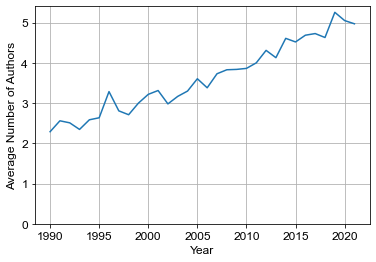

In [30]:
g = sns.lineplot(x='Year', 
                 y='Number of Authors', 
                 data = author_num_df)
g.set_ylim(0,)
g.set_ylabel('Average Number of Authors')
plt.grid()

### Number of participating countries

In [31]:
year_1990_paper = paper[paper.Year == 1990]
year_1990_cross_country = year_1990_paper[
    year_1990_paper['Cross-country Collaboration']==True]
year_1990_cross_country_dois = year_1990_cross_country.DOI.tolist()

In [32]:
year_1990_cross_country

,Conference,Year,Title,DOI,FirstPage,LastPage,PaperType,OpenAlex Year,OpenAlex Publication Date,OpenAlex ID,...,Number of Authors,Cross-type Collaboration,Cross-country Collaboration,With US Authors,Both Cross-type and Cross-country Collaboration,IEEE Title,Citation Counts on Google Scholar,Award,Award Name,Award Track
1042,Vis,1990,Methods for surface interrogation,10.1109/VISUAL.1990.146381,187.0,"193, 472",C,1990,1990-10-23,W2103253409,...,3.0,True,True,True,True,Methods for surface interrogation,55,False,NaN,NaN
2155,Vis,1990,A journey into the fourth dimension,10.1109/VISUAL.1990.146385,219.0,"229, 476-477",C,1990,1990-10-23,W2149054233,...,2.0,False,True,True,False,A journey into the fourth dimension (visualiza...,16,False,NaN,NaN


In [33]:
author[author.DOI.isin(year_1990_cross_country.DOI)]

,Year,DOI,Title,Number of Authors,Author Position,Author Name,OpenAlex Author ID,Affiliation Name,Affiliation Country Code,Affiliation Type,Binary Type,Cross-type Collaboration,International Collaboration
3614,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,1.0,H. Hagen,https://openalex.org/A2237445521,"FB-Informatik, Universität Kaiserslautern",DE,education,education,True,True
3615,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,2.0,T. Schreiber,https://openalex.org/A2973511128,"FB-Informatik, Universität Kaiserslautern",DE,education,education,True,True
3616,1990,10.1109/VISUAL.1990.146381,Methods for surface interrogation,3.0,3.0,E. Gschwind,https://openalex.org/A1980220218,"Mechanical Design Division, Hewlett-Packard GmbH",US,company,non-education,True,True
7745,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,1.0,Y. Ke,https://openalex.org/A2684845787,"Department of Computational Science, Universit...",CA,education,education,False,True
7746,1990,10.1109/VISUAL.1990.146385,A journey into the fourth dimension,2.0,2.0,E.S. Panduranga,https://openalex.org/A2302757246,"Department of Computer Sciences, Johns Hopkins...",US,education,education,False,True


### Cross country collaboration

In [34]:
def get_total_and_ratio_by_year(DF, BY, subgroup_par):
    tuples = []
    for group in DF.groupby(BY):
        year = group[0]
        total = group[1].shape[0]
        for subgroup in group[1].groupby(subgroup_par):
            subtype = 'Yes' if subgroup[0] else 'No'
            count = subgroup[1].shape[0]
            ratio = count / total
            tuples.append((year, subtype, count, ratio))
    dff = pd.DataFrame(
        list(tuples), columns=['year', 'type', 'count', 'ratio']) 
    return dff

In [35]:
cross_country = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-country Collaboration'
)

In [36]:
cross_country.head()

,year,type,count,ratio
0,1990,No,50,0.961538
1,1990,Yes,2,0.038462
2,1991,No,49,0.980000
3,1991,Yes,1,0.020000
4,1992,No,47,0.886792


In [37]:
cross_country[cross_country.year.isin([2004, 2005, 2006, 2003, 2013, 2012, 2014, 2021])]

,year,type,count,ratio
26,2003,No,91,0.892157
27,2003,Yes,11,0.107843
28,2004,No,79,0.814433
29,2004,Yes,18,0.185567
30,2005,No,98,0.823529
31,2005,Yes,21,0.176471
32,2006,No,90,0.796460
33,2006,Yes,23,0.203540
44,2012,No,74,0.637931
45,2012,Yes,42,0.362069


#### Author chord

In [38]:
author_chord = pd.read_csv('../data/plots/author_chord/author_chord_df.csv')
node1, node2 = author_chord.source, author_chord.target
unique_cntry = list(set(node1.append(node2).tolist()))

In [39]:
author_chord.value.sum()

1218

In [49]:
author_chord.head(10)

,source,target,value
0,CN,US,123
1,DE,US,112
2,CA,US,70
3,US,FR,59
4,US,AT,43
5,GB,US,33
6,CN,DE,31
7,DE,AT,29
8,KR,US,28
9,US,GB,25


In [41]:
tuples = []
for i in unique_cntry:
    dff = author_chord[(author_chord.source == i) | (author_chord.target == i)]
    total = dff.value.sum()
    tuples.append((i, total))

In [42]:
collab_df = pd.DataFrame(list(tuples), columns = ['country', 'value']).sort_values(
    by=['value'], ascending = False).reset_index(drop=True)
collab_df.value.sum()
most_active_cntry = collab_df.head(10).country.tolist()
# Number of pairs where the most active countries appeared
author_chord[(
    author_chord.source.isin(most_active_cntry)) | (
    author_chord.target.isin(most_active_cntry))].value.sum()
# most_active_cntry

1197

In [43]:
most_active_cntry

['US', 'DE', 'CN', 'AT', 'GB', 'FR', 'CA', 'NL', 'CH', 'AU']

In [44]:
1197/1218

0.9827586206896551

In [45]:
# Number of pairs made up by collaborations between most active countries
author_chord[(
    author_chord.source.isin(most_active_cntry)) & (
    author_chord.target.isin(most_active_cntry))].value.sum()

862

In [46]:
862/1218

0.7077175697865353

### Cross-type collaboration

In [47]:
cross_type = get_total_and_ratio_by_year(
    paper, 
    'Year',
    'Cross-type Collaboration'
)
cross_type.head()

,year,type,count,ratio
0,1990,No,47,0.903846
1,1990,Yes,5,0.096154
2,1991,No,43,0.860000
3,1991,Yes,7,0.140000
4,1992,No,43,0.811321


In [48]:
cross_type[cross_type.year.isin([2006, 2007, 2018, 2021])]

,year,type,count,ratio
32,2006,No,90,0.796460
33,2006,Yes,23,0.203540
34,2007,No,69,0.644860
35,2007,Yes,38,0.355140
56,2018,No,69,0.543307
57,2018,Yes,58,0.456693
62,2021,No,116,0.682353
63,2021,Yes,54,0.317647
